# PROBABILIDADES Y ESTADÍSTICA (C)

# Práctica 9

### Test de Hipótesis
---

![enunciado-3](./img/practica9/3.png)

In [1]:
data <- c(27, 41, 22, 27, 23, 35, 30, 24, 27, 28, 22)
data

[1] 27 41 22 27 23 35 30 24 27 28 22

In [6]:
n <- length(data)
n

[1] 11

In [3]:
mean(data)

[1] 27.81818

In [4]:
var(data)

[1] 33.76364

Hipótesis:

$$H_0: \sigma \geq 6$$

$$H_1 : \sigma < 6$$

Obs:
* Podría haber usado $H_0: \sigma = 6$, pero es lo mismo

Estadístico:

$$(n-1) \frac {S^2_n}{\sigma^2} \sim \mathbb \chi^2_{n-1}$$

Región de Rechazo:

* $\alpha = 0.05$

* $\chi^2_{n-1, \ 1-\alpha}$ : Convención de valor acumulado **a derecha**

$$\mathcal R = \left\{ (n-1) \frac {S^2_n}{\sigma^2} \leq \chi^2_{n-1, \ 1-0.05} \right\} $$

$$\mathcal R = \left\{ S^2_n \leq \chi^2_{n-1, \ 1-0.05} \frac {\sigma^2}{(n-1)} \right\} $$

Donde:

* $\chi^2_{n-1, \ 1-0.05} = \chi^2_{10, \ 0.95} \approx 3,940$

In [112]:
qchisq(df=10, 0.05)

[1] 3,940299

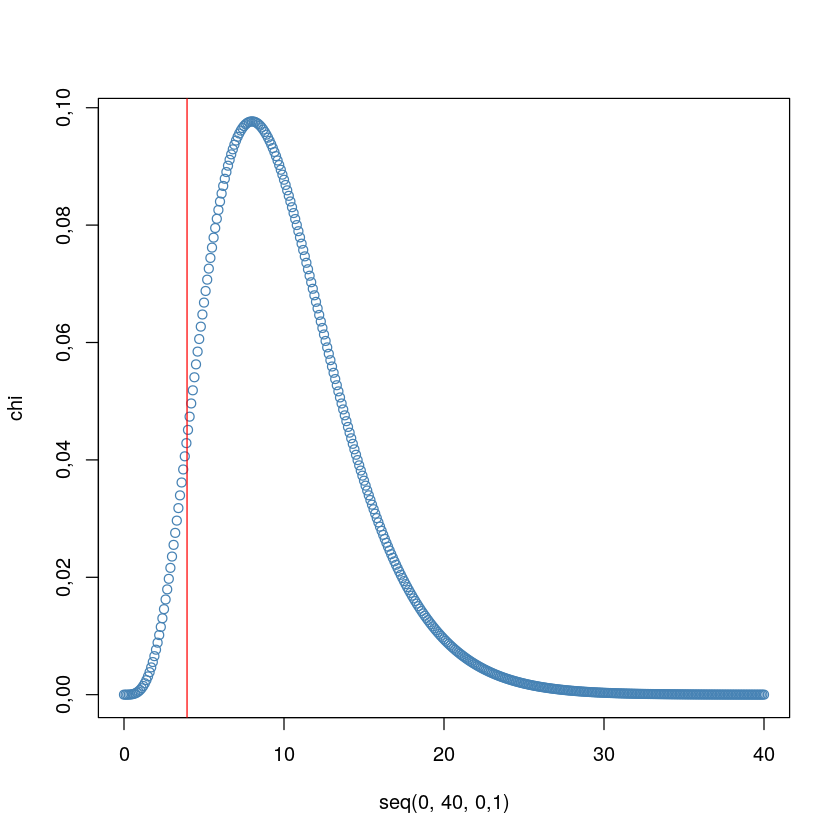

In [113]:
chi <- dchisq(df=10, seq(0, 40, 0.1))
plot(seq(0, 40, 0.1), chi, col='steelblue')

abline(v=qchisq(df=10, 0.05), col='red')

Función de potencia:

$$\mathcal P_{\sigma_1} \left( (n-1) \frac {S^2_n}{\sigma_0^2} \frac{\sigma_0^2}{\sigma_1^2} \leq \frac{\sigma_0^2}{\sigma_1^2} \chi^2_{n-1, \ 0.95} \right) = \alpha$$

$$\mathcal P_{\sigma_1} \left( (n-1) \frac {S^2_n}{\sigma_1^2} \leq \frac{\sigma_0^2}{\sigma_1^2} \chi^2_{n-1, \ 0.95} \right) = \alpha$$

$$\mathcal F_{X} \left( \frac{\sigma_0^2}{\sigma_1^2} \chi^2_{n-1, \ 0.95} \right) = \alpha$$

where:

* $X = (n-1) \frac {S^2_n}{\sigma_1^2} \sim \chi^2_{n-1, \ 0.95}$

Cumulative Chi Square $\mathcal F_X$

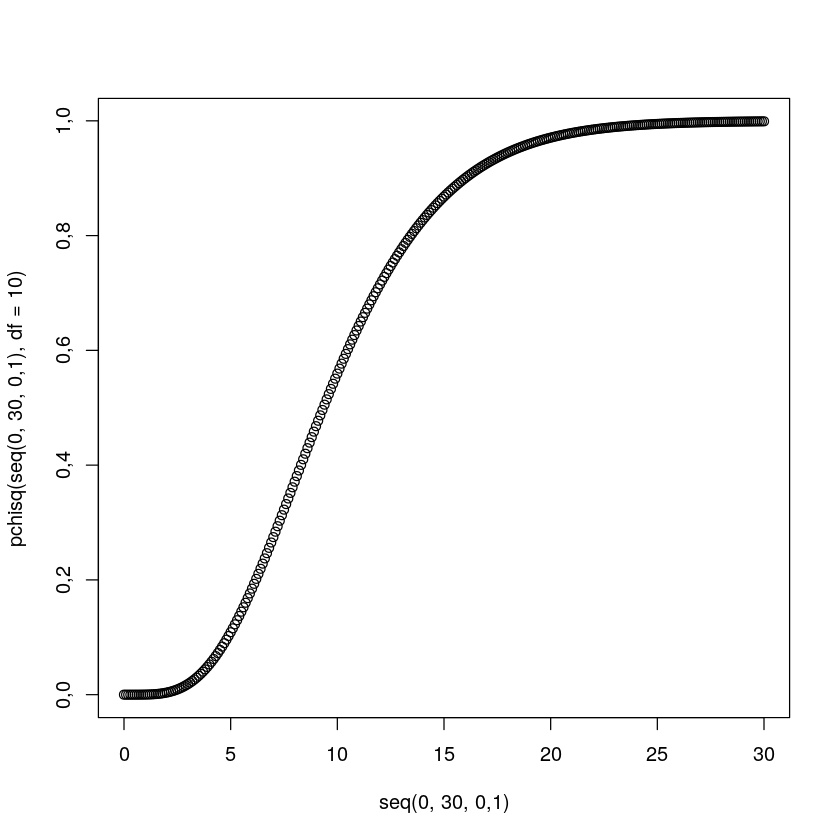

In [49]:
plot(seq(0, 30, 0.1), pchisq(seq(0, 30, 0.1), df=10))

Quería:

$$\mathcal F_{X} \left( \frac{\sigma_0^2}{\sigma_1^2} \chi^2_{n-1, \ 0.95} \right) = \alpha$$

where:

* $X = (n-1) \frac {S^2_n}{\sigma_1^2} \sim \chi^2_{n-1, \ 0.95}$

In [119]:
qchisq(0.05, df=10)
qchisq(0.95, df=10)

[1] 3,940299

[1] 18,30704

In [130]:
func_de_potencia <- function(s2_0, data, alfa=0.05){
    df <- length(data)-1
    chi_val <- qchisq(alfa, df=df)
    # s2_0 := Sigma_0^2
    ss2_1 <- seq(0, 100, 1) # Sigmas_1^2
    potencia <- pchisq(s2_0 / ss2_1 * chi_val, df=df)
    plot(seq(0, 100, 1), potencia, col='steelblue')
    abline(v=s2_0, col='red')
    return(potencia)
}

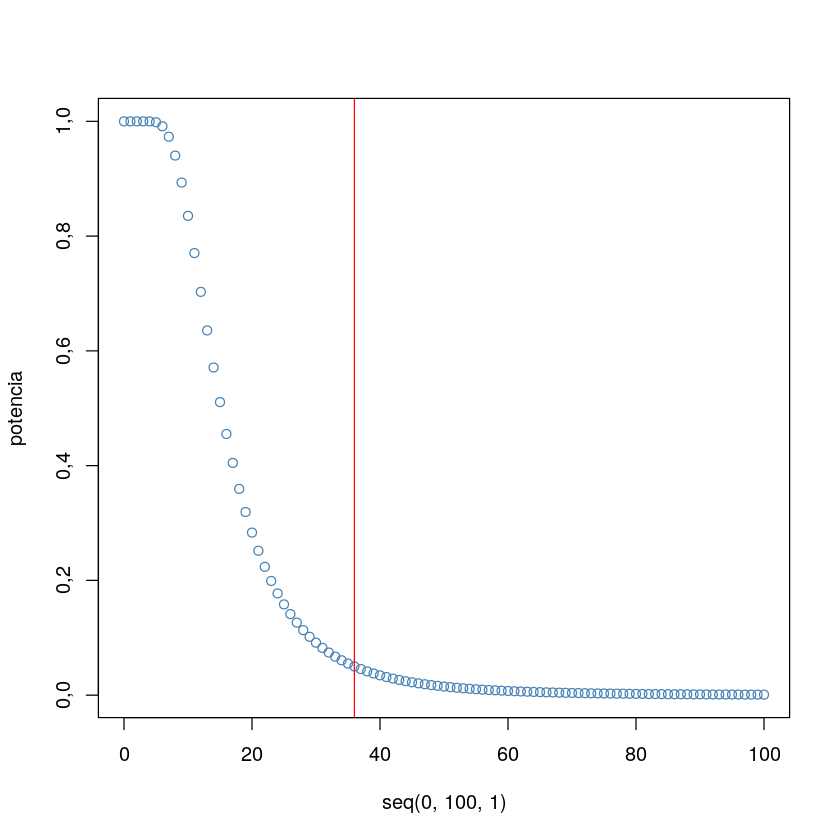

In [131]:
alphas <- func_de_potencia(6**2, data, alfa=0.05)

In [132]:
alfa <- 0.05
chi_val  <- qchisq(alfa, df=10)
sigma2_0 <- 6**2
sigma2_1 <- 6**2
potencia <- pchisq(sigma2_0 / sigma2_1 * chi_val, df=10)
potencia

[1] 0,05

Observamos que cuando $\sigma_1 = \sigma_0$, la potencia es de $0.05$, con $\alpha = 0.05$ el nivel de significatividad del test.

**Nivel de Significatividad:**

$$P_\theta(\mathcal R) = \alpha$$

* Es la **probabilidad ($\alpha$) de caer en la zona de rechazo**, dado que el valor verdadero del parámetro es $\theta$

Si la potencia es $0.05$, y los valores de theta real y de $H_0$ son el mismo, entonces la probabilidad de caer en la zona de rechazo (error tipo I) es $\alpha = 0.05$